## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display all colmns
pd.set_option('display.max_columns', None )
# display all rows
pd.set_option('display.max_rows', None )

## Reading Data

In [4]:
# Load the dataset
data = pd.read_csv('../data/train.csv')

# **Data Exploration & Understanding**

In [5]:
data.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Dictionary

In [6]:
# ID                         -> Unique row identifier (not useful for ML)
# Customer_ID                -> Unique customer identifier (can repeat for same customer)
# Month                      -> Month of the record (January, February...)
# Name                       -> Customer name (not useful for ML)
# Age                        -> Customer age (needs cleaning if negative values exist)
# SSN                        -> Social Security Number (not useful, remove for privacy)
# Occupation                 -> Job type of the customer
# Annual_Income              -> Total yearly income
# Monthly_Inhand_Salary      -> Actual monthly salary received after deductions
# Num_Bank_Accounts          -> Number of bank accounts the customer owns
# Num_Credit_Card            -> Number of credit cards the customer has
# Interest_Rate              -> Average interest rate applied on loans/credit
# Num_of_Loan                -> Number of active loans
# Type_of_Loan               -> Types of loans (education, auto, home...)
# Delay_from_due_date        -> How many days the payment was delayed
# Num_of_Delayed_Payment     -> Total number of delayed payments
# Changed_Credit_Limit       -> How much the credit limit was changed
# Num_Credit_Inquiries       -> How many times the customer applied for credit
# Credit_Mix                 -> Quality of credit mix (Good, Bad, Standard)
# Outstanding_Debt           -> Unpaid debt amount
# Credit_Utilization_Ratio   -> Percentage of credit limit being used
# Credit_History_Age         -> How long the credit history has existed
# Payment_of_Min_Amount      -> Whether customer pays minimum amount (Yes/No)
# Total_EMI_per_month        -> Total monthly loan installments
# Amount_invested_monthly    -> Monthly investment amount
# Payment_Behaviour          -> Spending/payment style (High_spent, Low_spent...)
# Monthly_Balance            -> Remaining balance at the end of month
# Credit_Score               -> Credit rating (Good, Standard, Poor) -> target (remove for clustering)

In [7]:
data.shape

(100000, 28)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [9]:
cat_cols = data.select_dtypes('object')
for col in cat_cols:
    print(f"{col} ({(len(data[col].unique()))}) :")
    print(data[col].unique())
    print("_" * 60)

ID (100000) :
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
____________________________________________________________
Customer_ID (12500) :
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
____________________________________________________________
Month (8) :
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
____________________________________________________________
Name (10140) :
['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
____________________________________________________________
Age (1788) :
['23' '-500' '28_' ... '4808_' '2263' '1342']
____________________________________________________________
SSN (12501) :
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
____________________________________________________________
Occupation (16) :
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_M

---
## Observations From the Dataset

---

## 1. General Structure & Uniqueness
- The dataset contains many features with **extremely high cardinality** (e.g., `ID`, `Name`, `Amount_invested_monthly`, `Monthly_Balance`).
- Some categorical fields have **very few unique values** despite many rows (e.g., `Month`, `Credit_Mix`, `Payment_of_Min_Amount`, `Credit_Score`).

---

## 2. Data Quality Issues

### A. Invalid or Corrupted Entries

**Age**
- Contains impossible values such as `-500`, `4808_`, `2263`, `1342`.
- Some values include trailing underscores.

**SSN**
- Some values have invalid special characters (e.g., `#F%$D@*&8`).

**Num_of_Loan**
- Contains unrealistic numbers (e.g., `967`, `1464`, `1485`).
- Many values have trailing underscores (e.g., `7_`).
- Includes negative values (e.g., `-100`).

**Num_of_Delayed_Payment**
- Includes extremely high values (e.g., `4128`, `4397`, `3909`).
- Some values are negative (e.g., `-1`, `-3`).
- Contains trailing underscores.

**Changed_Credit_Limit**
- Contains `'_'` → missing or corrupted entry.

**Credit_Mix**
- Includes `'_'` as a category → likely missing.

**Payment_Behaviour**
- Contains invalid string such as `!@9#%8`.

---

## 3. Missing Data
- Columns with missing (`nan`) values include:
  - `Name`
  - `Num_of_Delayed_Payment`
  - `Credit_History_Age`

---

## 4. Formatting Issues
- Numerical values contain underscores or extra characters (e.g., `34847.84_`, `0_`).
- Categorical fields show inconsistencies:
  - `Occupation` includes `_______` (likely missing).
  - `Type_of_Loan` combines multiple loan types in inconsistent formats.

---

## 5. Feature-Specific Observations

**Customer_ID**
- Structured as `CUS_` + hex-like ID (consistent).

**Month**
- Contains only January → August, suggesting partial-year data.

**Income & Debt**
- Income and debt values appear reasonable but formatting is inconsistent.

**Credit_History_Age**
- Follows consistent format (“X Years and Y Months”).
- Range spans from `0 Years` to `33 Years`.
- Some entries are missing.

---

## 6. High-Cardinality Numerical Fields
- `Amount_invested_monthly` (91k+ unique values) and  
  `Monthly_Balance` (98k+ unique values) appear to be continuous variables requiring normalization and outlier handling.

---

## 7. Target Variable
**Credit_Score**
- Categories: `Good`, `Standard`, `Poor`.
- Indicates a **classification problem**.

---

## Overall Summary
The dataset contains meaningful financial information but also presents **major data quality issues**, including:
- Corrupted numerical values  
- Unrealistic ranges  
- Missing and malformed data  
- Inconsistent formatting  

### The dataset will require:
- Cleaning corrupted or invalid values  
- Handling missing data  
- Normalizing numerical features  
- Splitting multi-value fields (`Type_of_Loan`)  
- Outlier detection  
- Encoding categorical variables  

## Percentage of Missing Values
Below is the proportion of missing values for each feature in the dataset:

In [10]:
(data.isnull().sum() / data.shape[0]) * 100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [11]:
data.duplicated().sum()

np.int64(0)

## **Data Cleaning & Preprocessing** 

## Removing Unnecessary Columns

In [12]:
target = data['Credit_Score']

In [13]:
drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_Score']

data = data.drop(columns = drop_cols , axis = 1)

In [14]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

## Handling `Age`

The `Age` column contains several issues such as non-numeric values, strings with extra characters, and negative ages. To clean this column, the following steps were applied:

1. Convert the `Age` column to numeric
2. Replace negative and invalid ages with NaN

- **People younger than 18 typically do not have credit history** (so values like 0–17 are often errors or special cases).
- **Ages above 95 are extremely rare in real credit datasets**

In [15]:
# convert 'Age' to numeric
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

data.loc[(data['Age'] < 18) | (data['Age'] > 90), 'Age'] = np.nan

In [16]:
data['Age'].dtype

dtype('float64')

## Handling `Occupation`

In [17]:
data['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [18]:
data['Occupation'] = data['Occupation'].replace('_______', np.nan)

In [19]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

## Handling `Annual_Income`

In [20]:
# convert 'Annual_Income' to numeric
data['Annual_Income'] = pd.to_numeric(data['Annual_Income'], errors='coerce')

In [21]:
data['Annual_Income'].describe()

count    9.302000e+04
mean     1.785790e+05
std      1.442878e+06
min      7.005930e+03
25%      1.943560e+04
50%      3.755074e+04
75%      7.284338e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

## Does the `Annual_Income` Summary Make Sense?


### Quartiles Look Reasonable
- 25% ≈ 19,435  
- 50% (median) ≈ 37,550  
- 75% ≈ 72,843  

These are typical annual income values, indicating that **most data points are normal**.

---

### Mean and Standard Deviation Are Suspicious
- **Mean = 178,579**, which is far above the median (37,550).  
- **Standard deviation = 1,442,878**, extremely high.

This strongly indicates the presence of **extreme outliers**.

---

### Maximum Value Is Unrealistic
- **Max = 24,198,060 (24 million)**  
This is not a realistic annual income for typical customers and suggests:
- Data entry errors  
- Wrong scaling (e.g., monthly × 12 incorrectly)  
- Extra digits added  

---

## Conclusion

- The quartiles (25%, 50%, 75%) make sense.  
- The mean, std, and max show **major outliers or corrupted data**.  
---

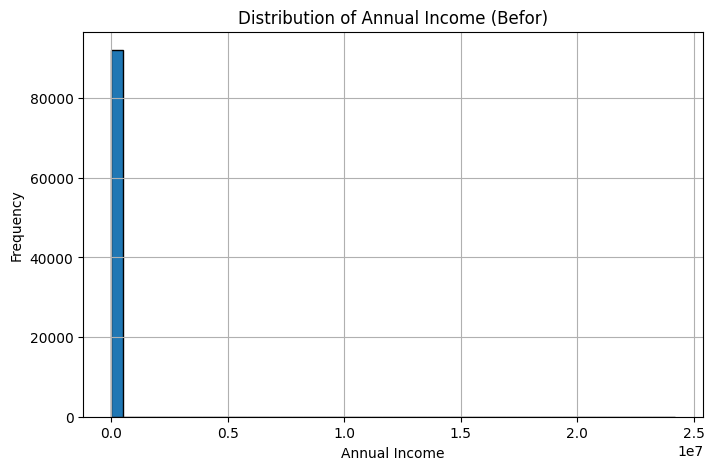

In [22]:
plt.figure(figsize=(8, 5))
data['Annual_Income'].hist(bins=50, edgecolor='black')
plt.title("Distribution of Annual Income (Befor)")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

## Detecting Outliers Using IQR

To identify and handle outliers in the `Annual_Income` column, the Interquartile Range (IQR) method is used. The IQR is a robust statistical measure that detects values that deviate significantly from the central distribution.

In [23]:
# Calculate the IQR (Interquartile Range) for Annual_Income
Q1 = data['Annual_Income'].quantile(0.25)
Q3 = data['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for valid income
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN
data.loc[(data['Annual_Income'] < lower_bound) | (data['Annual_Income'] > upper_bound), 'Annual_Income'] = np.nan

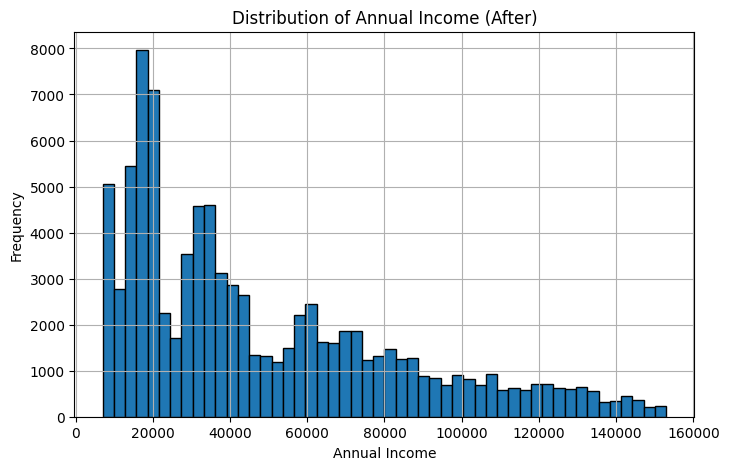

In [24]:
plt.figure(figsize=(8, 5))
data['Annual_Income'].hist(bins=50, edgecolor='black')
plt.title("Distribution of Annual Income (After)")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

In [25]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

## Handling `Num_Bank_Accounts`

In [26]:
data['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [27]:
# Replace negative and unrealistic high values with NaN
data.loc[(data['Num_Bank_Accounts'] < 0) | (data['Num_Bank_Accounts'] > 12), 'Num_Bank_Accounts'] = np.nan

In [28]:
data['Num_Bank_Accounts'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Bank_Accounts
Non-Null Count  Dtype  
--------------  -----  
98664 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


## Handling `Num_Credit_Card`

In [29]:
data['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

The valid range appears to be:

Most values: 4–7 cards
Outliers: 100–1499 cards (impossible)

So the column contains unrealistic outliers and must be cleaned.

In [30]:
data.loc[(data['Num_Credit_Card'] < 0) | (data['Num_Credit_Card'] > 15), 'Num_Credit_Card'] = np.nan


## Handling `Interest_Rate`

In [31]:
data['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

The column contains valid data between 1% and ~30%, BUT:
- Thousands of corrupted values
- Unrealistic interest rates (hundreds or thousands %)
- Skewed distribution
This column must be cleaned before analysis.

In [32]:
Q1 = data['Interest_Rate'].quantile(0.25)
Q3 = data['Interest_Rate'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data.loc[(data['Interest_Rate'] < lower) | (data['Interest_Rate'] > upper), 'Interest_Rate'] = np.nan

## Handling `Num_of_Loan`

In [33]:
data['Num_of_Loan'].dtype

dtype('O')

In [34]:
# convert 'Annual_Income' to numeric
data['Num_of_Loan'] = pd.to_numeric(data['Num_of_Loan'], errors='coerce')

In [35]:
data['Num_of_Loan'].describe()

count    95215.000000
mean         2.780339
std         62.500940
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [36]:
data.loc[(data['Num_of_Loan'] < 0) | (data['Num_of_Loan'] > 20), 'Num_of_Loan'] = np.nan

In [37]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      shape=(6261,), dtype=object)

## Why the `Type_of_Loan` Variable Is Difficult to Use

The **Type_of_Loan** variable is extremely challenging to preprocess and analyze due to several issues in the raw data:

1. **Highly inconsistent formatting**  
   Loan types appear in long text strings with random separators such as commas, “and”, hyphens, slashes, and even repeated words.  
   **Example:**  
   *“Auto Loan, Auto Loan, and Not Specified”*

2. **Multiple loan types combined into a single cell**  
   A single entry may contain 3–10 loans mixed together, which requires splitting, cleaning, deduplication, and canonicalization.  
   There is no reliable delimiter.

3. **Non-standard naming and spelling variations**  
   The same loan appears under many different textual forms:  
   *“Home Equity Loan”, “Home-Equity”, “Home Equity”, “HomeEq Loan”*  
   This makes matching and classification unreliable without heavy regex rules.

4. **Presence of irrelevant or ambiguous tokens**  
   Phrases like *“Not Specified”* appear frequently and mix with valid loan types.  
   Some rows contain only partial words like “Auto”, “Home”, “Loan” which do not clearly indicate a specific type.

5. **Large number of corrupted or empty rows**  
   Many entries are blank or contain fragments that cannot be parsed into clear loan types.

6. **Unreliable extraction across the dataset**  
   Because of all the inconsistencies above, even advanced cleaning and regex sometimes fail to consistently identify the correct loan types.  
   Extracted one-hot columns often become **all zeros**, meaning the raw field does not follow a stable pattern that can be decoded algorithmically.

---

### Conclusion

The **Type_of_Loan** variable is difficult to use because it is **not structured, not standardized, and contains heavy noise**, making automatic extraction of meaningful loan categories unreliable.  
For this reason, the variable may contribute **more errors than value**, and any modeling using it should be done carefully—or the column may need to be dropped entirely unless cleaner data becomes available.

In [38]:
data = data.drop('Type_of_Loan', axis = 1)

In [39]:
data.head(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177


## Handling `Delay_from_due_date`

In [40]:
data.loc[data['Delay_from_due_date'] < 0, 'Delay_from_due_date'] = np.nan

In [41]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

## Handling `Num_of_Delayed_Payment`

In [42]:
# convert 'Num_of_Delayed_Payment' to numeric
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'], errors='coerce')

In [43]:
data['Num_of_Delayed_Payment'].describe()

count    90254.000000
mean        31.033051
std        226.955758
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [44]:
data.loc[data['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = np.nan

In [45]:
Q1 = data['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = data['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data.loc[(data['Num_of_Delayed_Payment'] < lower) | (data['Num_of_Delayed_Payment'] > upper), 'Num_of_Delayed_Payment'] = np.nan

In [46]:
data['Num_of_Delayed_Payment'].unique()

array([ 7., nan,  4.,  6.,  1.,  0.,  8.,  5.,  3.,  9., 12., 15., 17.,
       10.,  2., 11., 14., 20., 22., 13., 16., 18., 19., 23., 24., 21.,
       26., 25., 27., 28.])

## Handling `Changed_Credit_Limit`

In [47]:
data['Changed_Credit_Limit'].dtype

dtype('O')

In [48]:
# convert 'Changed_Credit_Limit' to numeric
data['Changed_Credit_Limit'] = pd.to_numeric(data['Changed_Credit_Limit'], errors='coerce')

In [49]:
data['Changed_Credit_Limit'].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [50]:
data.loc[data['Changed_Credit_Limit'] < 0, 'Changed_Credit_Limit'] = np.nan

## Handling `Num_Credit_Inquiries`

In [51]:
data.loc[data['Num_Credit_Inquiries'] > 50, 'Num_Credit_Inquiries'] = np.nan

- The realistic range for credit inquiries is typically 0–20 per year.
- Values like 500, 1000, 2597 in the dataset are impossible in real life and indicate data corruption.
- Using 50 as a cutoff is a safe upper bound that removes clearly invalid values while preserving all reasonable ones.

## Handling `Credit_Mix`

In [52]:
data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [53]:
data['Credit_Mix'] = data['Credit_Mix'].replace('_', np.nan)

## Handling `Credit_History_age`

In [54]:
# convert Credit_History_age to number of months
# ex --> '2 Years 3 Months'  -->  27 months 

def convert_credit_age(x):
    try: # try except to handle this if output error go to except and return nan
        years = int(x.split(" ")[0]) # first part is year         ex --> '2 Years 3 Months' 
        months = int(x.split(" ")[3])  # Month is fourth part    
        return years * 12 + months
    except:
        return np.nan # return nan if error occurs

data['Credit_History_Age'] = data['Credit_History_Age'].apply(convert_credit_age)

In [55]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [56]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [57]:
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].replace('NM', 'Unknown')

## Handling `Total_EMI_per_month`

In [58]:
data['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

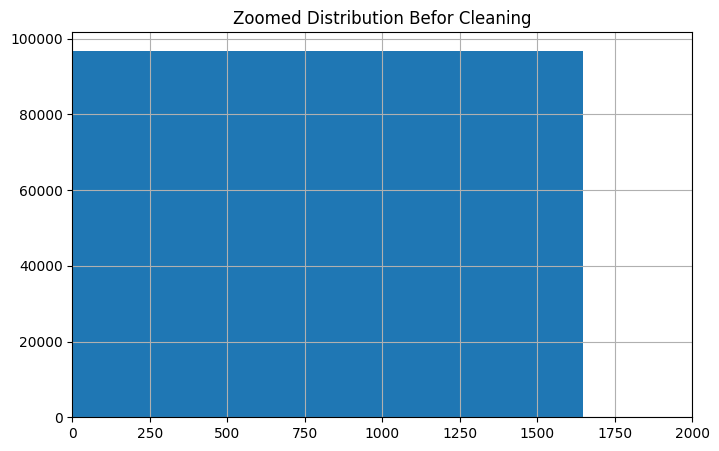

In [59]:
plt.figure(figsize=(8,5))
data['Total_EMI_per_month'].hist(bins=50)
plt.xlim(0, 2000)   # zoom into the useful range
plt.title("Zoomed Distribution Befor Cleaning")
plt.show()

In [60]:
p99 = data['Total_EMI_per_month'].quantile(0.99)
data.loc[data['Total_EMI_per_month'] > p99, 'Total_EMI_per_month'] = np.nan

Why `0.99` specifically:

- Because EMI values naturally vary, but not drastically. A realistic EMI range for most customers is between 0 and 5,000 depending on income. When the maximum jumps to 82,000, it is clear evidence of an abnormal value.

- Using the 99th percentile is safer than using the maximum or a fixed threshold because it automatically adapts to the distribution of your dataset.

- The 1% highest values are often the ones harming the model. They inflate the mean, distort scaling, and confuse machine-learning algorithms into thinking these are representative numbers.

- Banks use similar high-percentile caps for risk modeling. In credit scoring, extremely large financial values are always inspected or capped because they are not trusted.

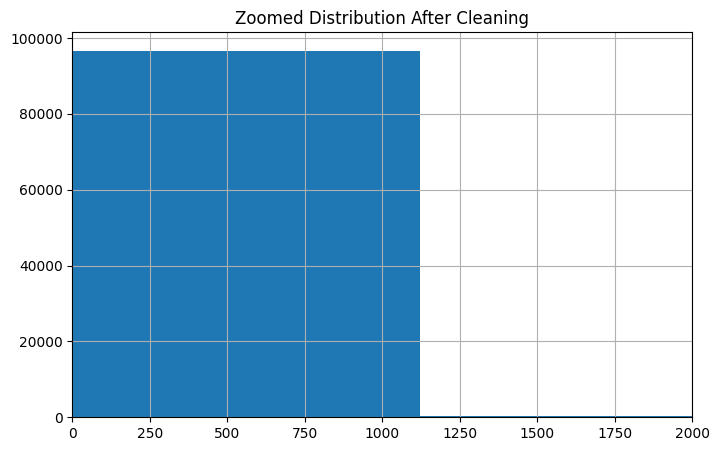

In [61]:
plt.figure(figsize=(8,5))
data['Total_EMI_per_month'].hist(bins=50)
plt.xlim(0, 2000)   # zoom into the useful range
plt.title("Zoomed Distribution After Cleaning")
plt.show()

In [62]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

## Handling `Amount_invested_monthly`

In [63]:
data['Amount_invested_monthly'].dtype

dtype('O')

In [64]:
# convert 'Changed_Credit_Limit' to numeric
data['Amount_invested_monthly'] = pd.to_numeric(data['Amount_invested_monthly'], errors='coerce')

In [65]:
data['Amount_invested_monthly'].describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

## Handling `Payment_Behaviour`

In [66]:
data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [67]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [68]:
valid_categories = {
    "High_spent_Small_value_payments",
    "Low_spent_Large_value_payments",
    "Low_spent_Medium_value_payments",
    "Low_spent_Small_value_payments",
    "High_spent_Medium_value_payments",
    "High_spent_Large_value_payments"
}

def clean_payment_behavior(x):
    if x in valid_categories:
        return x
    else:
        return "Unknown"

data['Payment_Behaviour'] = data['Payment_Behaviour'].apply(clean_payment_behavior)

## Handling `Monthly_Balance`

In [69]:
data['Monthly_Balance'].dtype

dtype('O')

In [70]:
# convert 'Monthly_Balance' to numeric
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'], errors='coerce')

## Handling `Outstanding_Debt`

In [71]:
data['Outstanding_Debt'] = pd.to_numeric(data['Outstanding_Debt'], errors = 'coerce')

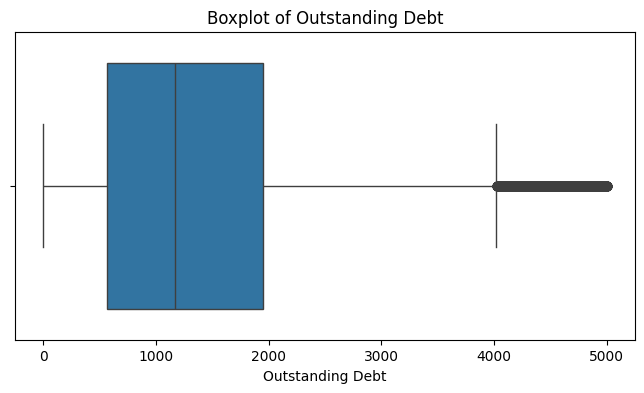

In [72]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data, x='Outstanding_Debt')
plt.title("Boxplot of Outstanding Debt")
plt.xlabel("Outstanding Debt")
plt.show()

In [73]:
Q1 = data['Outstanding_Debt'].quantile(0.25)
Q3 = data['Outstanding_Debt'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data.loc[(data['Outstanding_Debt'] < lower) | (data['Outstanding_Debt'] > upper), 'Outstanding_Debt'] = np.nan

In [74]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,86932.0,NaN,NaN,NaN,34.422779,10.113152,18.0,26.0,34.0,42.0,56.0
Occupation,92938,15,Lawyer,6575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,90458.0,NaN,NaN,NaN,48370.116233,35191.331168,7005.93,19197.3,36379.24,69857.985,152947.12
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,98664.0,NaN,NaN,NaN,5.36898,2.592451,0.0,3.0,5.0,7.0,11.0
Num_Credit_Card,97732.0,NaN,NaN,NaN,5.533612,2.068336,0.0,4.0,5.0,7.0,15.0
Interest_Rate,97966.0,NaN,NaN,NaN,14.531603,8.739748,1.0,7.0,13.0,20.0,34.0
Num_of_Loan,90895.0,NaN,NaN,NaN,3.53465,2.448862,0.0,2.0,3.0,5.0,19.0
Delay_from_due_date,99409.0,NaN,NaN,NaN,21.207245,14.794693,0.0,10.0,18.0,28.0,67.0


## Handling Missing Values

In [75]:
(data.isna().sum() / data.shape[0]) * 100

Month                        0.000
Age                         13.068
Occupation                   7.062
Annual_Income                9.542
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            1.336
Num_Credit_Card              2.268
Interest_Rate                2.034
Num_of_Loan                  9.105
Delay_from_due_date          0.591
Num_of_Delayed_Payment      11.085
Changed_Credit_Limit         3.677
Num_Credit_Inquiries         3.599
Credit_Mix                  20.195
Outstanding_Debt             6.223
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          1.000
Amount_invested_monthly      8.784
Payment_Behaviour            0.000
Monthly_Balance              1.209
dtype: float64

## Imputing Missing Values

In [76]:
# ---------- CONFIG ----------
N_NEIGHBORS = 5
WEIGHTS = 'distance'  # 'uniform' or 'distance'
SCALE_NUMERIC = True   # set False to skip scaling (not recommended)
RANDOM_STATE = 42
# ----------------------------

# Make a working copy so we don't accidentally clobber original
df = data.copy()

# 1) Detect columns types
# treat 'object' and 'category' dtype as categorical
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# 2) Prepare encoders for categorical columns
label_encoders = {}
# We'll replace missing strings with a sentinel 'MISSING' so LabelEncoder can learn a class
for c in cat_cols:
    df[c] = df[c].astype(object)  # ensure object dtype
    df[c] = df[c].where(df[c].notna(), 'MISSING')
    # Also convert problematic placeholders (like 'NM') to 'MISSING' if you want:
    # df[c] = df[c].replace({'NM':'MISSING', '': 'MISSING'})
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))
    label_encoders[c] = le

# 3) Build matrix for imputation: numeric + encoded categorical
impute_cols = num_cols + cat_cols
X = df[impute_cols].copy()

# 4) Optionally scale numeric columns (recommended)
scaler = None
if SCALE_NUMERIC and len(num_cols) > 0:
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])

# 5) Run KNN imputer
imputer = KNNImputer(n_neighbors=N_NEIGHBORS, weights=WEIGHTS)
X_imputed = imputer.fit_transform(X)

# 6) Put imputed values back into a DataFrame with same columns/index
X_imputed_df = pd.DataFrame(X_imputed, columns=impute_cols, index=df.index)

# 7) Inverse scale numeric columns (if scaled)
if SCALE_NUMERIC and scaler is not None:
    X_imputed_df[num_cols] = scaler.inverse_transform(X_imputed_df[num_cols])

# 8) Convert categorical columns back to original labels
for c in cat_cols:
    le = label_encoders[c]
    # values may be floats (from imputer). Round to nearest integer and clip to valid classes
    vals = np.rint(X_imputed_df[c].values).astype(int)
    vals = np.clip(vals, 0, len(le.classes_) - 1)
    # inverse_transform expects int-coded array
    reconstructed = le.inverse_transform(vals)
    # Replace our sentinel 'MISSING' back to np.nan if you'd prefer real missingness
    reconstructed = pd.Series(reconstructed, index=df.index).replace('MISSING', np.nan).values
    X_imputed_df[c] = reconstructed

# 9) For numeric columns, optionally round if they represent counts
# (example: Num_Bank_Accounts, Num_Credit_Card, Num_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries)
# update the list to include any integer-valued features you want rounded
int_like_cols = [
    'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries'
]
for c in int_like_cols:
    if c in X_imputed_df.columns:
        # round and convert to integer safely while maintaining NaNs
        X_imputed_df[c] = X_imputed_df[c].round()
        # If you want ints with NaNs, keep as float; else convert to Int64 (nullable integer)
        try:
            X_imputed_df[c] = X_imputed_df[c].astype('Int64')
        except Exception:
            # fallback: keep as float if conversion fails
            pass

# 10) Replace the columns in the original dataframe with imputed results
df_imputed = df.copy()
for c in impute_cols:
    df_imputed[c] = X_imputed_df[c].values

# 11) Diagnostics: compare missing counts before & after
print("\nMissing values BEFORE imputation:")
print(data[impute_cols].isna().sum().sort_values(ascending=False).head(20))
print("\nMissing values AFTER imputation:")
print(df_imputed[impute_cols].isna().sum().sort_values(ascending=False).head(20))

# 12) Quick statistical sanity checks
print("\nSample describe() of numeric columns AFTER imputation:")
print(df_imputed[num_cols].describe().T)

# 13) Assign back to 'data' or to a new variable as you prefer
# If you want to overwrite the original `data` DataFrame:
data_imputed = data.copy()
for c in impute_cols:
    data_imputed[c] = df_imputed[c].values

# Keep a record: data_imputed is your final imputed DataFrame
print("\nImputation complete. Result stored in variable: data_imputed")

Numeric columns: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
Categorical columns: ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

Missing values BEFORE imputation:
Credit_Mix                  20195
Monthly_Inhand_Salary       15002
Age                         13068
Num_of_Delayed_Payment      11085
Annual_Income                9542
Num_of_Loan                  9105
Credit_History_Age           9030
Amount_invested_monthly      8784
Occupation                   7062
Outstanding_Debt             6223
Changed_Credit_Limit         3677
Num_Credit_Inquiries         3599
Num_Credit_Card              2268
Interest_Rate                2034
Num_Bank_

In [77]:
data_imputed.isna().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

In [78]:
data_imputed['Occupation'] = data_imputed['Occupation'].fillna("Unknown")
data_imputed['Credit_Mix'] = data_imputed['Credit_Mix'].fillna("Unknown")

In [79]:
data_imputed.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000.0,NaN,NaN,NaN,34.289849,9.599228,18.0,27.0,34.0,41.0,56.0
Occupation,100000,16,Unknown,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000.0,NaN,NaN,NaN,49430.364481,35931.515799,7005.93,19608.98,36825.36,70978.78,152947.12
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,4162.144212,3128.65477,303.645417,1666.976173,3062.501667,5886.733333,15204.633333
Num_Bank_Accounts,100000.0,<NA>,<NA>,<NA>,5.36881,2.586626,0.0,3.0,5.0,7.0,11.0
Num_Credit_Card,100000.0,<NA>,<NA>,<NA>,5.53234,2.05689,0.0,4.0,5.0,7.0,15.0
Interest_Rate,100000.0,NaN,NaN,NaN,14.533218,8.716457,1.0,7.0,13.0,20.0,34.0
Num_of_Loan,100000.0,<NA>,<NA>,<NA>,3.53585,2.409808,0.0,2.0,3.0,5.0,19.0
Delay_from_due_date,100000.0,NaN,NaN,NaN,21.134926,14.782777,0.0,10.0,18.0,28.0,67.0


In [80]:
data[num_cols] = data_imputed[num_cols]
data[cat_cols] = data_imputed[cat_cols]

In [81]:
data['Credit_Score'] = target.values

In [82]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.000000,Scientist,19114.12,1824.843333,3,4,3.0,4,3.000000,7,11.27000,4,Unknown,809.98,26.822620,265.000000,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.000000,Scientist,19114.12,2872.373276,3,4,3.0,4,5.176627,5,11.27000,4,Good,809.98,31.944960,308.148623,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,46.306254,Scientist,19114.12,1971.988107,3,4,3.0,4,3.000000,7,9.09303,4,Good,809.98,28.609352,267.000000,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.000000,Scientist,19114.12,1419.794763,3,4,3.0,4,5.000000,4,6.27000,4,Good,809.98,31.377862,268.000000,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.000000,Scientist,19114.12,1824.843333,3,4,3.0,4,6.000000,4,11.27000,4,Good,809.98,24.797347,269.000000,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [89]:
data.tail(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,April,25.0,Mechanic,39628.990000,3359.415833,4,6,7.000000,2,23.0,7,11.5,3,Unknown,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,25.0,Mechanic,39628.990000,3359.415833,4,6,7.000000,2,18.0,7,11.5,3,Unknown,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,25.0,Mechanic,39628.990000,3359.415833,4,6,9.590436,2,27.0,6,11.5,3,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,July,25.0,Mechanic,39628.990000,3359.415833,4,6,7.000000,2,20.0,9,11.5,3,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard
99999,August,25.0,Mechanic,35670.511074,3359.415833,4,6,7.000000,2,18.0,6,11.5,3,Good,502.38,34.192463,382.0,No,35.104023,167.163865,Unknown,393.673696,Poor


In [83]:
data.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [84]:
data.duplicated().sum()

np.int64(0)

In [85]:
cat_cols = data.select_dtypes('object')
for col in cat_cols:
    print(f"{col} ({(len(data[col].unique()))}) :")
    print(data[col].unique())
    print("_" * 60)

Month (8) :
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
____________________________________________________________
Occupation (16) :
['Scientist' 'Unknown' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
____________________________________________________________
Credit_Mix (4) :
['Unknown' 'Good' 'Standard' 'Bad']
____________________________________________________________
Payment_of_Min_Amount (3) :
['No' 'Unknown' 'Yes']
____________________________________________________________
Payment_Behaviour (7) :
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'Unknown'
 'High_spent_Large_value_payments']
____________________________________________________________
Credit_Score (3) :
['Good' 'Standard' 'Poor']
__________________

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  Int64  
 6   Num_Credit_Card           100000 non-null  Int64  
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  Int64  
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  Int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  Int64  
 13  Credit_Mix                100000 non-null  ob

---

# **The Dataset Is Now Fully Cleaned and Ready for the Next Step**

In [87]:
data.to_csv('cleaned_data.csv', index = False)

In [88]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')